### The difference between SVM and SVR

正如前面提到的，SVM算法非常通用:它不仅支持线性和非线性分类，还支持线性和非线性回归。这里的技巧在于反转目标:在限制违规保证金的同时，支持向量机回归尝试在间隔上尽可能多地匹配实例，而不是尝试在两个类之间匹配最大可能的间隔。，街上的实例)。
- https://github.com/ageron/handson-ml/blob/master/05_support_vector_machines.ipynb
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [8]:
import os
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, SVC
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[0])
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Perceptron

# Accuracy classification score
from sklearn.metrics import accuracy_score
# %matplotlib inline

#### Raw data

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


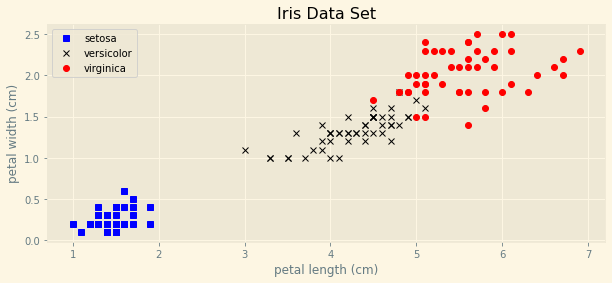

In [9]:
iris = datasets.load_iris()
print(iris.feature_names)
# X = iris['data'][:, 2]   # petal length
# y = iris['data'][:, 3]   # petal width
# print(X[:5])
# print(y[:5])

X = iris.data  # 只包括样本的特征，150x4
y = iris.target  # 样本的类型，[0, 1, 2]
features = iris.feature_names  # 4个特征的名称
targets = iris.target_names  # 3类鸢尾花的名称，跟y中的3个数字对应

plt.figure(figsize=(10, 4))
plt.plot(X[:, 2][y==0], X[:, 3][y==0], 'bs', label=targets[0])
plt.plot(X[:, 2][y==1], X[:, 3][y==1], 'kx', label=targets[1])
plt.plot(X[:, 2][y==2], X[:, 3][y==2], 'ro', label=targets[2])
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.title('Iris Data Set')
plt.legend()
# plt.savefig('Iris Data Set.png', dpi=200)
plt.show()

In [10]:
targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Perceptron

In [11]:
print(y), type(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


(None, numpy.ndarray)

In [115]:
y==2
X.shape, X[:5],y.shape, y[:]

((150, 4),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 (150,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [13]:
X_perc = X[:,(2,3)]
y_perc = y.copy()
y_perc[y==2]=1  # 现在只有两类，0或非0
print(y_perc)
clf_perc = Perceptron(  #感知器 Perceptron是一种分类算法，与SGDClassifier有相同的底层实现
    max_iter=100,  #训练数据的最大迭代次数
    verbose=0,  #输出日志的详细程度
    random_state=None,  #用于打乱训练数据
    fit_intercept=True,  #是否估计截距。如果为False，则假定数据已经中心化。
    eta0=0.002  #更新乘以的常数
)
clf_perc.fit(X_perc, y_perc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Perceptron(eta0=0.002, max_iter=100, random_state=None)

0.8 4


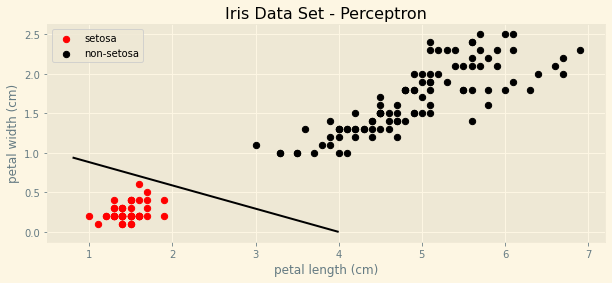

In [117]:
# 绘制原始数据 Plot the original data
def plot_decision_boundary(X, y, clf, boundary_range, colors):
    seto = plt.scatter(X[y==0, 0], X[y==0, 1], color=colors[0], s=40)
    non_seto = plt.scatter(X[y==1, 0], X[y==1, 1], color=colors[1], s=40)
    plt.legend((seto, non_seto), ('setosa', 'non-setosa'))
    b_xmin, b_xmax = boundary_range
    print(b_xmin, b_xmax)
    w = clf.coef_[0]
    b = clf.intercept_[0]
    a = -w[0]/w[1]  # 决策界线的斜率slope of decision boundary line
    x_plot = np.linspace(b_xmin, b_xmax)
    y_plot = a * x_plot - b/w[1]
    
    # Plot the line
    plt.plot(x_plot, y_plot, 'k-', label='decision boundary')

plt.figure(figsize=(10, 4))
colormap = np.array(['r', 'k'])
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.title('Iris Data Set - Perceptron')
plot_decision_boundary(X=X_perc, y=y_perc, clf=clf_perc, boundary_range=(0.8, 4), colors=colormap)
plt.savefig('04_1_perceptron.png', dpi=200)
plt.show()

#### SVM - 线性可分的情况

In [15]:
X_svm = X[:,(2,3)]
y_svm = y.copy()
y_svm[y==2]=1  # 现在只有两类，0或非0

In [16]:
clf_svm1 = SVC(kernel="linear", C=1e4)
clf_svm1.fit(X_svm, y_svm)

SVC(C=10000.0, kernel='linear')

In [17]:
x0 = np.linspace(1, 5, 20)
x0

array([1.        , 1.21052632, 1.42105263, 1.63157895, 1.84210526,
       2.05263158, 2.26315789, 2.47368421, 2.68421053, 2.89473684,
       3.10526316, 3.31578947, 3.52631579, 3.73684211, 3.94736842,
       4.15789474, 4.36842105, 4.57894737, 4.78947368, 5.        ])

In [18]:
x0 + .5

array([1.5       , 1.71052632, 1.92105263, 2.13157895, 2.34210526,
       2.55263158, 2.76315789, 2.97368421, 3.18421053, 3.39473684,
       3.60526316, 3.81578947, 4.02631579, 4.23684211, 4.44736842,
       4.65789474, 4.86842105, 5.07894737, 5.28947368, 5.5       ])

In [19]:
def plot_svm_decision_boundary(X, y, svm_clf, boundary_range, shift, colors, label_name):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    b_xmin, b_xmax = boundary_range
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(b_xmin, b_xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    decision_boundary_left = -w[0]/w[1] * (x0 - shift) - b/w[1]
    decision_boundary_right = -w[0]/w[1] * (x0 + shift) - b/w[1]

    margin = 1/w[1]  # 沿x1移动的距离
    gutter_up = decision_boundary_right + margin
    gutter_down = decision_boundary_left - margin
    plt.scatter(X[svm_clf.support_][:, 0], X[svm_clf.support_][:, 1], s=180, facecolors='#FFAAAA')
    seto = plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[0], s=40)
    non_seto = plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[1], s=40)
    plt.legend((seto, non_seto), ('{}'.format(label_name), 'non-{}'.format(label_name)))

#     svs = svm_clf.support_vectors_
#     plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0+shift, gutter_up, "k--", linewidth=2)
    plt.plot(x0-shift, gutter_down, "k--", linewidth=2)
#     plt.show()

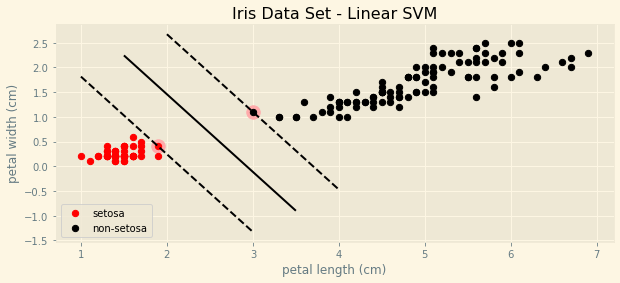

In [20]:
plt.figure(figsize=(10, 4))
colormap = np.array(['r', 'k'])
plot_svm_decision_boundary(X=X_svm, y=y_svm, svm_clf=clf_svm1, boundary_range=(1.5, 3.5), shift=0.5, 
                           colors=colormap, label_name='setosa')
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.title('Iris Data Set - Linear SVM')
plt.savefig('04_2_linear_svm1.png', dpi=200)
plt.show()

#### SVM - 线性不可分的情况

In [21]:
X_svm2 = X[:,(2,3)]
y_svm2 = y.copy()
y_svm2[y!=2]=1
y_svm2[y==2]=0  # 现在只有两类，2或非2

In [120]:
clf_svm2 = SVC(kernel="linear", C=1e3)  # 当C非常大时，无法得到结果
clf_svm2.fit(X_svm2, y_svm2)

SVC(C=1000.0, kernel='linear')

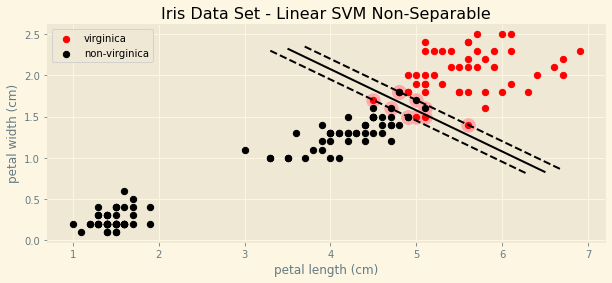

In [121]:
plt.figure(figsize=(10, 4))
colormap = np.array(['r', 'k'])
plot_svm_decision_boundary(X=X_svm2, y=y_svm2, svm_clf=clf_svm2, boundary_range=(3.5, 6.5), shift=-0.2, 
                           colors=colormap, label_name='virginica')
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.title('Iris Data Set - Linear SVM Non-Separable')
plt.savefig('04_2_linear_svm2.png', dpi=200)
plt.show()

#### SVR

分出一部分数据来做test

In [24]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [67]:
X_svr = X_train[:, 2]  # only use X, training set
y_svr = X_train[:, 3]
X_svr.shape, y_svr.shape

((120,), (120,))

In [71]:
X_svr_t = X_test[:, 2]  # test set
y_svr_t = X_test[:, 3]
X_svr_t.shape, y_svr_t.shape

((30,), (30,))

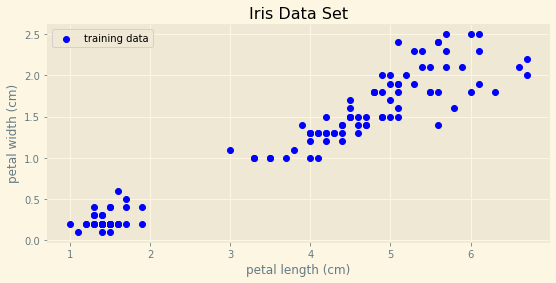

In [28]:
plt.figure(figsize=(9, 4))  # width, height in inches
n_set_plt = plt.scatter(X_svr, y_svr, c='b', label='training data')
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.title('Iris Data Set')
plt.legend(loc="upper left")
plt.savefig('04_2_linear_svr1.png', dpi=200)
plt.show()

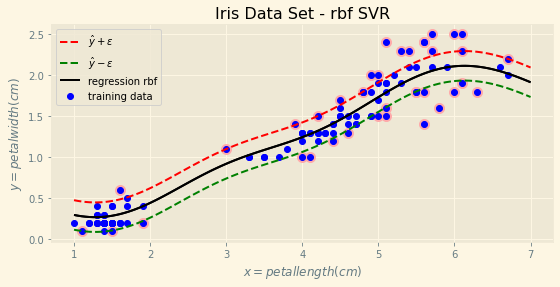

训练集R2评分:0.937


In [162]:
svr_lin = SVR(kernel='linear', C=1, epsilon=0.18)
svr_rbf = SVR(kernel='rbf', C=1, epsilon=0.18)

fit = svr_rbf
svr_fit = fit.fit(X_svr.reshape(-1, 1), y_svr)

lw = 2

plt.figure(figsize=(9, 4))  # width, height in inches

axes = [1, 7, 0, 2.5]
x1s = np.linspace(axes[0], axes[1], 120).reshape(120, 1)
y_pred = svr_fit.predict(x1s)

plt.plot(x1s, y_pred, "k-", linewidth=2)
plt.plot(x1s, y_pred + fit.epsilon, "r--", label=r"$\hat{y} + \epsilon$")  # 回归线向上平移epsilon
plt.plot(x1s, y_pred - fit.epsilon, "g--", label=r"$\hat{y} - \epsilon$")  # 回归线向下平移epsilon
plt.plot(x1s, y_pred, color='k', lw=lw, label='regression {}'.format(fit.kernel))

plt.scatter(X_svr[fit.support_], y_svr[fit.support_], s=100, facecolors='#FFAAAA')  #支持向量
plt.scatter(X_svr, y_svr, color='b', label='training data')
plt.xlabel(r"$x = {}$".format(features[2]), fontsize=12)
plt.ylabel(r"$y = {}$".format(features[3]), fontsize=12, rotation=90)  # 可以设置旋转角度
plt.title('Iris Data Set - {} SVR'.format(fit.kernel))
plt.legend()
plt.savefig('04_2_linear_svr2.png', dpi=200)
plt.show()
print('训练集R2评分:%.3f' % fit.score(X_svr.reshape(-1, 1), y_svr))

In [166]:
print('support_支持向量的下标',fit.support_.shape)
print('support_vectors_支持向量',fit.support_vectors_.shape)
print('n_support_每个类别的支持向量数量',fit.n_support_)
print('dual_coef_决策函数中支持向量的系数',fit.dual_coef_.shape)
print('intercept_决策函数中的常量',fit.intercept_)

support_支持向量的下标 (37,)
support_vectors_支持向量 (37, 1)
n_support_每个类别的支持向量数量 [37]
dual_coef_决策函数中支持向量的系数 (1, 37)
intercept_决策函数中的常量 [1.19786201]


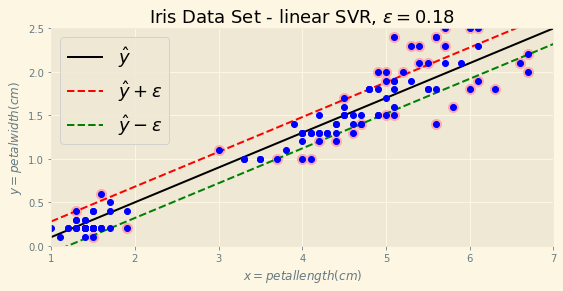

In [151]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")  # 预测的回归线
    plt.plot(x1s, y_pred + svm_reg.epsilon, "r--", label=r"$\hat{y} + \epsilon$")  # 回归线向上平移epsilon
    plt.plot(x1s, y_pred - svm_reg.epsilon, "g--", label=r"$\hat{y} - \epsilon$")  # 回归线向下平移epsilon
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=100, facecolors='#FFAAAA')  #支持向量
    plt.plot(X, y, "bo")
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))  # width, height in inches
# plt.subplot(121)

plot_svm_regression(fit, X_svr, y_svr, [1, 7, 0, 2.5])  # 后面是坐标轴的范围
plt.title(r"Iris Data Set - {} SVR, $\epsilon = {}$".format(fit.kernel, fit.epsilon), fontsize=18)
plt.xlabel(r"$x = {}$".format(features[2]), fontsize=12)
plt.ylabel(r"$y = {}$".format(features[3]), fontsize=12, rotation=90)  # 可以设置旋转角度
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
# plt.annotate(
#         '', xy=(eps_x1, eps_y_pred), xycoords='data',
#         xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
#         textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
#     )
plt.savefig('04_2_linear_svr3.png', dpi=200)
plt.show()

In [32]:
mean_squared_error(svr_lin.predict(X_svr_t.reshape(-1, 1)), y_svr_t)

0.04616748153923556